# Dedup by similar Name
In this last notebook, I will chek if there're similar records by name and drop duplicated rows if available.

## Import

In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import process, fuzz
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',-1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load in the data from part 03

In [2]:
data = pd.read_csv('03out')
data.head()

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
0,Akebono Farmers’ Market,7:00 AM to 2:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 2:00 PM,NaN,NaN,Pahoa,Akebono Parking Lot,"Akebono Parking Lot, Pahoa",Hawaii,"(19.49469006600043, -154.94809898999975)",NaN,Vinton,(808) 965-9205,NaN
1,Ala Moana Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,9:00 AM to 1:00 PM,9:00 AM to 1:00 PM,NaN,1450 Ala Moana Blvd,Honolulu,"Ala Moana Center, upper deck by Sears, corner of Piikoi & Ala Moana Blvd.",NaN,Oahu,"(21.28928015800045, -157.84219969299974)",alamoanafarmersmarket.com/ala-moana.html,NaN,(808) 388-9696,AlaMoanaFarmersMarket@gmail.com
2,Alii Garden Market Place,9:00 AM to 5:00 PM,NaN,NaN,9:00 AM to 5:00 PM,9:00 AM to 5:00 PM,9:00 AM to 5:00 PM,9:00 AM to 5:00 PM,9:00 AM to 5:00 PM,NaN,75-6129 Alii Drive,Kailua-Kona,NaN,NaN,Hawaii,"(19.61399064100044, -155.98165889099974)",NaN,NaN,(808) 334-1381,NaN
3,Banyan Court Mall (People's Open Market),NaN,NaN,NaN,NaN,NaN,NaN,6:15 AM to 7:30 AM,6:15 AM to 7:30 AM,NaN,800 North King Street,Honolulu,NaN,NaN,Oahu,"(21.302690421000477, -157.85208973299973)",www.co.honolulu.hi.us/parks/programs/pom,NaN,(808) 522-7088,NaN
4,Benjamin Parker Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 2:00 PM,8:00 AM to 2:00 PM,NaN,45-259 Waikalua Road,Kaneohe,NaN,NaN,Oahu,"(21.413500808000435, -157.79883930699975)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


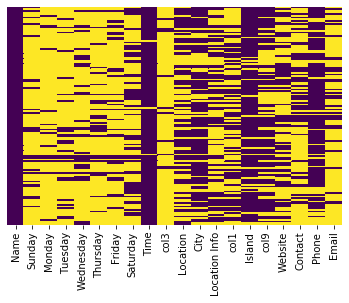

In [3]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

## Find similar names

Using FuzzyWuzzy package to find similar Names. I choose token set ratio as the scorer.

In [4]:
#Create tuples of names, matched names, and the score
score = [(x,) + i
         for x in data['Name'] 
         for i in process.extract(x, data['Name'], scorer=fuzz.token_set_ratio)]

In [5]:
#Create dataframe from the tuples
similarity = pd.DataFrame(score, columns=['Name','match','score','index'])
similarity['set'] = np.minimum(similarity['Name'], similarity['match'])

In [6]:
#Pick names with 100% of similarity
high_score = similarity[(similarity['score'] == 100) & 
                        (similarity['Name'] != similarity['match']) & 
                        (similarity['set'] != similarity['match'])]
high_score = high_score.drop('set',axis=1).copy()

In [7]:
#Group names by matches and scores
high_score.groupby(['match','score']).agg({'Name': '; '.join}).sort_values(['Name'])

,,Name
match,score,
Hali'imaile Farmers' Market at Hali'imaile Town Center,100,Hali'imaile Farmers' Market
Ho'oulu Community Farmers Market at Keauhou Beach Resort Royal Gardens,100,Ho'oulu Community Farmers Market
"Honokaa Farmer’s Market at Old Botelho Bldg., Downtown Honokaa",100,Honokaa Farmer’s Market
Honolulu Farmers' Market at Neal S. Blaisdell Center,100,Honolulu Farmers' Market
Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church,100,Honolulu Farmers' Market
Mahiku Farmers' Market at International Market Place-Waikiki,100,International Market Place; Mahiku Farmers' Market
Kahaluu Farmers' Market at Windward Baptist Church,100,Kahaluu Farmers' Market
Kalihi Farmers' Market at Kapalama Elementary School,100,Kalihi Farmers' Market
Village Farmers’ Market,100,Keaau Village Farmers’ Market


We'll go over each group and drop the one with less information

In [8]:
data[(data['Name'] == "Hali'imaile Farmers' Market at Hali'imaile Town Center") |
     (data['Name'] == "Hali'imaile Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
18,Hali'imaile Farmers' Market,NaN,NaN,NaN,NaN,NaN,1:00 PM to 6:00 PM,NaN,1:00 PM to 6:00 PM,NaN,NaN,NaN,NaN,Hali'imaile Town Center (in a former Maui Pineapple Co. parking lot next to Hali'imaile General Store),NaN,NaN,NaN,NaN,NaN,NaN
19,Hali'imaile Farmers' Market at Hali'imaile Town Center,NaN,NaN,NaN,NaN,NaN,1:00 PM to 6:00 PM,NaN,1:00 PM to 6:00 PM,NaN,900 Haliimaile Rd,Makawao,in former Maui Pineapple Co. parking lot next to Hali'imaile General Store,NaN,Maui,"(20.868329790000473, -156.34021118699974)",NaN,NaN,(808) 463-1676,NaN


In [9]:
data.drop([18], inplace=True)

In [10]:
data[(data['Name'] == "Ho'oulu Community Farmers Market at Keauhou Beach Resort Royal Gardens") |
     (data['Name'] == "Ho'oulu Community Farmers Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
30,Ho'oulu Community Farmers Market,NaN,NaN,NaN,12:30 PM to 5:30 PM,NaN,NaN,NaN,12:30 PM to 5:30 PM,NaN,NaN,NaN,NaN,Keauhou Beach Resort Royal Gardens,NaN,NaN,NaN,Kumu Keala Ching,(808) 324-2540,keala.ching@outrigger.com
31,Ho'oulu Community Farmers Market at Keauhou Beach Resort Royal Gardens,NaN,NaN,NaN,12:30 PM to 5:30 PM,NaN,NaN,NaN,12:30 PM to 5:30 PM,NaN,NaN,NaN,NaN,NaN,Hawaii,NaN,NaN,Kumu Keala Ching,(808) 324-2540,keala.ching@outrigger.com


In [11]:
data.drop([30], inplace=True)

In [12]:
data[(data['Name'] == "Honokaa Farmer’s Market at Old Botelho Bldg., Downtown Honokaa") |
     (data['Name'] == "Honokaa Farmer’s Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
32,Honokaa Farmer’s Market,NaN,NaN,NaN,NaN,NaN,NaN,7:30 AM to 2:00 PM,7:30 AM to 2:00 PM,NaN,NaN,NaN,NaN,"Old Botelho Bldg., Downtown Honokaa",NaN,NaN,NaN,NaN,NaN,NaN
33,"Honokaa Farmer’s Market at Old Botelho Bldg., Downtown Honokaa",NaN,NaN,NaN,NaN,NaN,NaN,7:30 AM to 2:00 PM,7:30 AM to 2:00 PM,NaN,NaN,NaN,NaN,NaN,Hawaii,NaN,NaN,NaN,NaN,NaN


In [13]:
data.drop([32], inplace=True)

In [14]:
data[(data['Name'] == "Honolulu Farmers' Market at Neal S. Blaisdell Center") | 
     (data['Name'] == "Honolulu Farmers' Market") |
     (data['Name'] == "Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
34,Honolulu Farmers' Market,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,Neal S. Blaisdell Center (Ward Ave. & Kapiolani Blvd.),NaN,NaN,www.hfbf.org,NaN,(808) 848-2074,NaN
35,Honolulu Farmers' Market at Neal S. Blaisdell Center,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,777 Ward Ave,Honolulu,Ward Ave. & King Street,NaN,Oahu,"(21.29999544000043, -157.85177574799974)",www.hfbf.org,NaN,(808) 848-2074,NaN
86,Nuuanu Farmers Market at Honolulu Central Seventh Day Adventist Church,NaN,NaN,4:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,4:00 PM to 7:00 PM,NaN,2313 Nuuanu Avenue,Honolulu,NaN,Honolulu Central Seventh Day Adventist Church,Oahu,"(21.326480443000435, -157.84731928399975)",NaN,NaN,(808) 282-2276,nuuanumarket@gmail.com


In [15]:
data.drop([34], inplace=True)

In [16]:
data[(data['Name'] == "Mahiku Farmers' Market at International Market Place-Waikiki") |
     (data['Name'] == "International Market Place") |
     (data['Name'] == "Mahiku Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
36,International Market Place,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,2330 Kalakaua Avenue,Honolulu,Next to Food Court,NaN,Oahu,"(21.277500376000432, -157.82711977399973)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
65,Mahiku Farmers' Market,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,NaN,NaN,International Market Place-Waikiki (near the Food Court),NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
66,Mahiku Farmers' Market at International Market Place-Waikiki,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,Honolulu,International Market Place-Waikiki (near the Food Court),NaN,Oahu,"(21.304850435000446, -157.85774940299973)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [17]:
data.drop([65], inplace=True)

In [18]:
data[(data['Name'] == "Kahaluu Farmers' Market at Windward Baptist Church") |
     (data['Name'] == "Kahaluu Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
37,Kahaluu Farmers' Market,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,NaN,NaN,NaN,Windward Baptist Church at 47-528A Kamehameha Hwy. (Across from 7-11),NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
38,Kahaluu Farmers' Market at Windward Baptist Church,NaN,NaN,NaN,NaN,NaN,3:00 PM to 7:00 PM,NaN,3:00 PM to 7:00 PM,NaN,47-528A Kamehameha Hwy,NaN,Across from 7-11,NaN,Oahu,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [19]:
data.drop([37], inplace=True)

In [20]:
data[(data['Name'] == "Kalihi Farmers' Market at Kapalama Elementary School") |
     (data['Name'] == "Kalihi Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
43,Kalihi Farmers' Market,7:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,Kapalama Elementary School - 1601 N. School Street,NaN,NaN,www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
44,Kalihi Farmers' Market at Kapalama Elementary School,7:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 1:00 PM,NaN,1601 N. School Street,Honolulu,Kapalama Elementary School,NaN,Oahu,"(21.335250464000467, -157.86880934999974)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com


In [21]:
data.drop([43], inplace=True)

In [22]:
data[(data['Name'] == "Village Farmers’ Market") |
     (data['Name'] == "Keaau Village Farmers’ Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
52,Keaau Village Farmers’ Market,NaN,NaN,7:00 AM to 5:00 PM,7:00 AM to 5:00 PM,7:00 AM to 5:00 PM,7:00 AM to 5:00 PM,7:00 AM to 5:00 PM,7:00 AM to 5:00 PM,NaN,16-0550 Old Volcano Road,NaN,NaN,NaN,Hawaii,NaN,NaN,NaN,(808) 966-4853,NaN
113,Village Farmers’ Market,8:00 AM to 5:00 PM,NaN,NaN,NaN,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,NaN,NaN,Kailua-Kona,"Across from Hale Halawai, Kailua-Kona","Across from Hale Halawai, Kailua-Kona",Hawaii,NaN,NaN,NaN,NaN,NaN


In [23]:
data[(data['Name'] == "Keauhou Farmer’s Market at Keauhou Shopping Center") |
     (data['Name'] == "Keauhou Farmer’s Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
53,Keauhou Farmer’s Market,NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 12:00 PM,8:00 AM to 12:00 PM,NaN,NaN,NaN,NaN,"Keauhou Shopping Center, fronting Ace Hardware",NaN,NaN,NaN,Nancy,"(808) 322-3118, (808) 322-2362",nkona@hawaii.rr.com
54,Keauhou Farmer’s Market at Keauhou Shopping Center,NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 12:00 PM,8:00 AM to 12:00 PM,NaN,NaN,NaN,fronting Ace Hardware,NaN,Hawaii,NaN,NaN,Nancy,"(808) 322-2362, (808) 322-3118",nkona@hawaii.rr.com


In [24]:
data.drop([53], inplace=True)

In [25]:
data[(data['Name'] == "Waikiki Farmers' Market") |
     (data['Name'] == "Mahiku Farmers' Market at International Market Place-Waikiki")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
66,Mahiku Farmers' Market at International Market Place-Waikiki,NaN,NaN,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,4:00 PM to 8:00 PM,NaN,NaN,Honolulu,International Market Place-Waikiki (near the Food Court),NaN,Oahu,"(21.304850435000446, -157.85774940299973)",www.mahikufarmersmarket.com,Sonny Doung,(808) 225-4002,sonnydoung@hotmail.com
120,Waikiki Farmers' Market,NaN,NaN,7:00 AM to 1:00 PM,NaN,NaN,7:00 AM to 1:00 PM,NaN,7:00 AM to 1:00 PM,NaN,NaN,NaN,Waikiki Community Center's Parking Lot,Waikiki Community Center's Parking Lot,Oahu,"(21.304850435000446, -157.85774940299973)",NaN,NaN,(808) 923-1802,NaN


In [26]:
data[(data['Name'] == "Maui Swap Meet at Maui Community College") |
     (data['Name'] == "Maui Swap Meet")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
78,Maui Swap Meet,NaN,NaN,NaN,NaN,NaN,NaN,6:00 AM to 1:00 PM,6:00 AM to 1:00 PM,NaN,NaN,NaN,NaN,Maui Community College on Ka'ahumanu Avenue (lot nearest to Kahului Beach Road),NaN,NaN,NaN,NaN,(808) 244-3100,NaN
79,Maui Swap Meet at Maui Community College,NaN,NaN,NaN,NaN,NaN,NaN,6:00 AM to 1:00 PM,6:00 AM to 1:00 PM,NaN,310 Ka'ahumanu Avenue,Kahului,Maui Community College (lot nearest to Kahului Beach Road),NaN,Maui,"(20.88888047000046, -156.47681997699974)",NaN,NaN,(808) 877-3100,NaN


In [27]:
data.drop([78], inplace=True)

In [28]:
data[(data['Name'] == "North Shore Country Market at Sunset Beach Elementary School") |
     (data['Name'] == "North Shore Country Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
84,North Shore Country Market,NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 2:00 PM,8:00 AM to 2:00 PM,NaN,NaN,Haleiwa,NaN,"Sunset Beach Elementary School, Haleiwa",NaN,NaN,"www.northshorecountrymarket.com, www.sunsetcountrymarket.org",NaN,(808) 237-8248,NaN
85,North Shore Country Market at Sunset Beach Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,8:00 AM to 2:00 PM,8:00 AM to 2:00 PM,NaN,NaN,Haleiwa,NaN,NaN,Oahu,"(21.58948073400046, -158.10290913599974)",www.northshorecountrymarket.com,NaN,(808) 237-8248,NaN


In [29]:
data.drop([84], inplace=True)

In [30]:
data[(data['Name'] == "Ono Organic Farms Farmers' Market in Hana") |
     (data['Name'] == "Ono Organic Farms Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
88,Ono Organic Farms Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All day,NaN,NaN,NaN,"Old gas station, Hasegawa General Store - Hana Hwy.",NaN,NaN,NaN,NaN,NaN,NaN
89,Ono Organic Farms Farmers' Market in Hana,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,10:00 AM to 6:00 PM,NaN,149 Hana Highway,Hana,"Old gas station, Hasegawa General Store - Hana Hwy.",NaN,Maui,"(20.80699101600044, -156.09087728399973)",NaN,NaN,(808) 248-7779,NaN


In [31]:
data.drop([88], inplace=True)

In [32]:
data[(data['Name'] == "The Maui's Fresh Produce Farmer's Market at Queen Ka'ahumanu Shopping Center") |
     (data['Name'] == "The Maui's Fresh Produce Farmer's Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
102,The Maui's Fresh Produce Farmer's Market,NaN,NaN,7:00 AM to 4:00 PM,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,NaN,Kahului,NaN,Queen Ka'ahumanu Shopping Center (center stage area),NaN,NaN,NaN,Pepito Valdez,(808) 298-4289,NaN
103,The Maui's Fresh Produce Farmer's Market at Queen Ka'ahumanu Shopping Center,NaN,NaN,7:00 AM to 4:00 PM,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,275 W. Ka’ahumanu Ave,Kahului,Center stage area,NaN,Maui,"(20.881122485000446, -156.47201774299972)",NaN,NaN,(808) 877-4325,NaN


In [33]:
data.drop([102], inplace=True)

In [34]:
data[(data['Name'] == "The South Kona Green Market at Amy Greenwell Ethnobotanical Garden field in") |
          (data['Name'] == "The South Kona Green Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
106,The South Kona Green Market,9:00 AM to 2:00 PM,NaN,NaN,NaN,NaN,NaN,9:00 AM to 2:00 PM,9:00 AM to 2:00 PM,NaN,NaN,NaN,NaN,Amy Greenwell Ethnobotanical Garden field in Captain Cook,NaN,NaN,www.skgm.org,Esta Feedora,(808) 328-2400,NaN
107,The South Kona Green Market at Amy Greenwell Ethnobotanical Garden field in,9:00 AM to 2:00 PM,NaN,NaN,NaN,NaN,NaN,9:00 AM to 2:00 PM,9:00 AM to 2:00 PM,NaN,NaN,Captain Cook,NaN,NaN,Hawaii,"(19.496937200000446, -155.92166908399975)",www.skgm.org,Esta Feedora,(808) 328-2400,NaN


In [35]:
data.drop([106], inplace=True)
data.loc[107]['Name'] = 'The South Kona Green Market at Amy Greenwell Ethnobotanical Garden'

In [36]:
data[(data['Name'] == "Under the Banyan’s Farmers’ Market in Hawi") |
     (data['Name'] == "Under the Banyan’s Farmers’ Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
108,Under the Banyan’s Farmers’ Market,NaN,NaN,NaN,NaN,NaN,NaN,7:30 AM to 1:00 PM,7:30 AM to 1:00 PM,NaN,NaN,Hawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Under the Banyan’s Farmers’ Market in Hawi,NaN,NaN,NaN,NaN,NaN,NaN,7:30 AM to 1:00 PM,7:30 AM to 1:00 PM,NaN,NaN,NaN,NaN,NaN,Hawaii,NaN,NaN,NaN,NaN,NaN


In [37]:
data.drop([108], inplace=True)

In [38]:
data[(data['Name'] == "Upcountry Farmers' Market at Pukalani Longs Drugs at Kulamalu") |
     (data['Name'] == "Upcountry Farmers' Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
110,Upcountry Farmers' Market,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 12:00 PM,7:00 AM to 12:00 PM,NaN,NaN,NaN,NaN,(formerly at Eddie Tam Community Center) Pukalani Longs Drugs at Kulamalu,NaN,NaN,NaN,NaN,NaN,NaN
111,Upcountry Farmers' Market at Pukalani Longs Drugs at Kulamalu,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 12:00 PM,7:00 AM to 12:00 PM,NaN,55 Kiopaa St,Makawao,in the parking lot next to Long's Drugs at Kulamalu,NaN,Maui,"(20.822089506000452, -156.33009308199973)",NaN,NaN,NaN,info@upcountryfarmersmarket.com


In [39]:
data.drop([110], inplace=True)

In [40]:
data[(data['Name'] == "Waikoloa Village Farmers Market") |
     (data['Name'] == "Village Farmers’ Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
113,Village Farmers’ Market,8:00 AM to 5:00 PM,NaN,NaN,NaN,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,8:00 AM to 5:00 PM,NaN,NaN,Kailua-Kona,"Across from Hale Halawai, Kailua-Kona","Across from Hale Halawai, Kailua-Kona",Hawaii,NaN,NaN,NaN,NaN,NaN
121,Waikoloa Village Farmers Market,NaN,NaN,NaN,NaN,NaN,NaN,7:15 AM to 10:00 AM,7:15 AM to 10:00 AM,NaN,68-3625 Paniolo Ave,Waikoloa,Waikoloa Community Church Parking Lot,Waikoloa Community Church Parking Lot,Hawaii,"(19.942734768000435, -155.79099041899974)",NaN,NaN,NaN,NaN


In [41]:
data[(data['Name'] == "Waimea Town Market at Parker School") |
     (data['Name'] == "Waimea Town Market")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
123,Waimea Town Market,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 2:00 PM,7:00 AM to 2:00 PM,NaN,NaN,NaN,NaN,Parker School Behind Paniolo Country Inn,NaN,NaN,NaN,NaN,NaN,NaN
124,Waimea Town Market at Parker School,NaN,NaN,NaN,NaN,NaN,NaN,7:00 AM to 2:00 PM,7:00 AM to 2:00 PM,NaN,NaN,NaN,Behind Paniolo Country Inn,NaN,Hawaii,NaN,NaN,NaN,NaN,NaN


In [42]:
data.drop([123], inplace=True)

We have dropped a number of duplicated rows. Now for rows that don't have time information, let's see if they're duplicated.

In [43]:
data[data[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']].isna().all(axis=1)]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
20,Hana Fresh Market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4590 Hāna Highway,Hana,between mile markers 34 and 35.,NaN,Maui,"(20.64924257700045, -156.06698936499973)",NaN,NaN,(808) 248-7515,NaN
60,Koloa Ball Park (Knudsen) (Sunshine Markets),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noon,NaN,Koloa,Maluhia Road,"Maluhia Road, Koloa",Kauai,NaN,NaN,Branch Harmony,(808) 322-0718,NaN


These are two different markets. I would like to check duplicated values for rows that have same operation time

In [44]:
#Select data that have non-missing weekday time
weekday = data[data[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']].notna().any(axis=1)]

In [45]:
#Print out potential duplicated names
weekday[weekday.duplicated(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],keep=False)] \
.sort_values(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])['Name']

73     Mamo Street Market                                                          
92     Panaewa Hawaiian Home Lands Farmers’ Market                                 
10     Ewa Beach Elementary School                                                 
17     Hale'iwa Farmers' Market                                                    
63     Laupahoehoe Farmers' Market                                                 
7      Davies Pacific Center                                                       
80     Merchant Street Market                                                      
76     Maui Mall Farmers' Market & Craft Fair                                      
103    The Maui's Fresh Produce Farmer's Market at Queen Ka'ahumanu Shopping Center
14     First Insurance Center                                                      
96     Restaurant Row Farmers' Market                                              
36     International Market Place                                           

Let's check this one

In [46]:
data[(data['Name'] == "Maui Mall Farmers' Market & Craft Fair") |
     (data['Name'] == "The Maui's Fresh Produce Farmer's Market at Queen Ka'ahumanu Shopping Center")]

,Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Time,col3,Location,City,Location Info,col1,Island,col9,Website,Contact,Phone,Email
76,Maui Mall Farmers' Market & Craft Fair,NaN,NaN,7:00 AM to 4:00 PM,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,70 East Kaahumanu Ave,Kahului,NaN,"Maui Mall, Kahului",Maui,"(20.892510160000427, -156.46427968799975)",NaN,Cynda Hearn,(808) 871-1307,NaN
103,The Maui's Fresh Produce Farmer's Market at Queen Ka'ahumanu Shopping Center,NaN,NaN,7:00 AM to 4:00 PM,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,7:00 AM to 4:00 PM,NaN,275 W. Ka’ahumanu Ave,Kahului,Center stage area,NaN,Maui,"(20.881122485000446, -156.47201774299972)",NaN,NaN,(808) 877-4325,NaN


These are not the same market. I believe we've got the dataset with unique rows. Before dropping col1, let's see if we can use its data to fill in any missing values in Location Info.

In [47]:
data[data['Location Info'].isna() & data['col1'].notna()][['Location','City','col1']]

,Location,City,col1
22,NaN,NaN,Old Hanapepe Town
26,NaN,Hanalei,"Waipa, Hanalei"
63,NaN,NaN,Laupahoehoe - next to the Minit Stop on Hwy. 19
64,95 Lipoa Street,Kihei,Liipoa Street in Kihei
72,NaN,NaN,"Highway 130, between Keaau and Pahoa"
73,NaN,Hilo,"Mamo Parking Lot, Hilo"
76,70 East Kaahumanu Ave,Kahului,"Maui Mall, Kahului"
86,2313 Nuuanu Avenue,Honolulu,Honolulu Central Seventh Day Adventist Church
92,NaN,NaN,"Corner of Puainako and Ohuohu., On the sidewalk of Hilo WalMart"
99,84-4770 Mamalahoa Hwy,Captain Cook,"Near the old Higashi Store, between mile marker 103 &104"


In [48]:
#Fill in missing Location Info
data['Location Info'] = np.where(data['Location Info'].isna() & data['col1'].notna(),
                                 data['col1'], data['Location Info'])

In [49]:
#Drop col1
data.drop('col1', axis=1, inplace=True)

In [50]:
#keep col3 and col9
data.rename(columns={'col3': 'Schedule','col9': 'Coordinate'},inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 129
Data columns (total 19 columns):
Name             114 non-null object
Sunday           22 non-null object
Monday           14 non-null object
Tuesday          25 non-null object
Wednesday        29 non-null object
Thursday         24 non-null object
Friday           27 non-null object
Saturday         44 non-null object
Time             112 non-null object
Schedule         9 non-null object
Location         71 non-null object
City             90 non-null object
Location Info    70 non-null object
Island           112 non-null object
Coordinate       79 non-null object
Website          54 non-null object
Contact          40 non-null object
Phone            91 non-null object
Email            26 non-null object
dtypes: object(19)
memory usage: 17.8+ KB


Compared to the original dataset with 230 records, this one only has 114 records. So half of the data are duplicated.

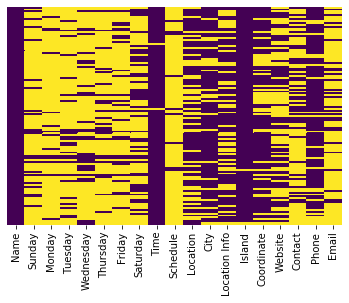

In [52]:
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)

In [53]:
data.to_csv('final',index=False)